## 개요
파이썬(주피터노트북) 환경에서 Shape(SHP) 파일 등의 공간데이터 파일을 로딩하고, 지도 형태로 시각화 해보겠습니다.

---

## 사용할 패키지 준비
shp 파일을 손쉬게 다룰 수 있는 가장 대표적인 패키지(라이브러리)인 geopandas를 불러옵니다 

In [2]:
# import 패키지명 (as 별칭)
# 별칭은 패키지명이 길 때 효율적으로 패키지명을 불러 쓰기 위한 용도 등입니다. 
import geopandas as gpd

In [3]:
# import pandas as pd
# pd.options.display.float_format = '{:,.1f}'.format  #화면 출력시 숫자 표시
# pd.set_option('float_format', '{:f}'.format)  # 숫자가 지수 형태로 표시되지 않도록 

https://datascienceschool.net/01%20python/02.13%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80%20%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0.html

---

## 사용할 데이터 준비
국내 공간 공공데이터 대표 사이트 중 한 곳인 "국가공간정보포털"의 "행정경계(시도)" shp을 이용해 보겠습니다.   
http://data.nsdi.go.kr/dataset/12942

In [4]:
shp_path = 'data/shp/NGII_CDM_행정경계(시도)/Z_NGII_N3A_G0010000.shp'
sido_gdf = gpd.read_file(shp_path)

geopandas의 read_file을 이용하면 쉽게 shp 파일을 이용할 수 있습니다. read_file에서는 geopackage(.gpkg)와 geojson도 지원합니다.   

아래의 .info()는 데이터의 행, 열 등의 기본적인 정보를 볼 수 있는 기능이고   
.head()는 맨 위 다섯줄을 눈으로 확인해볼 수 있는 기능입니다.  

In [5]:
sido_gdf.info()
sido_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   UFID      17 non-null     object  
 1   BJCD      17 non-null     object  
 2   NAME      17 non-null     object  
 3   DIVI      17 non-null     object  
 4   SCLS      0 non-null      object  
 5   FMTA      0 non-null      object  
 6   geometry  17 non-null     geometry
dtypes: geometry(1), object(6)
memory usage: 1.1+ KB


,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry
0,ARB0100000000001E,5000000000,Á¦ÁÖÆ¯º°ÀÚÄ¡µµ,HJD004,None,None,"MULTIPOLYGON (((932629.315 1508520.449, 932629..."
1,ARB0100000000002F,4800000000,°æ»ó³²µµ,HJD004,None,None,"MULTIPOLYGON (((1049231.579 1666542.963, 10492..."
2,ARB0100000000003G,4700000000,°æ»óºÏµµ,HJD004,None,None,"MULTIPOLYGON (((1163496.075 1906689.767, 11635..."
3,ARB0100000000004H,4600000000,Àü¶ó³²µµ,HJD004,None,None,"MULTIPOLYGON (((898759.456 1670482.743, 898760..."
4,ARB0100000000005I,4500000000,Àü¶óºÏµµ,HJD004,None,None,"MULTIPOLYGON (((953538.952 1794637.930, 953543..."


geopandas는 이름에서부터 pandas 패키지를 기반으로 하고 있는 것을 알 수 있고, pandas의 함수(기능)와 매우 유사합니다.   
따라서, 공간 분석/시각화 위주로 작업을 한다고 해도 pandas의 기능을 필요로 할 경우가 많기 때문에   
pandas의 주요 기능을 알아두면 좋습니다.   
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf  

head로 일부 속성 정보를 조회해봤을 때 NAME 항목의 한글이 깨져 보입니다.   
Geopandas.read_file reference에서 인코딩(encoding) 부분에서 답을 찾을 수 있습니다.  
https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html 

## 지도 시각화

<AxesSubplot: >

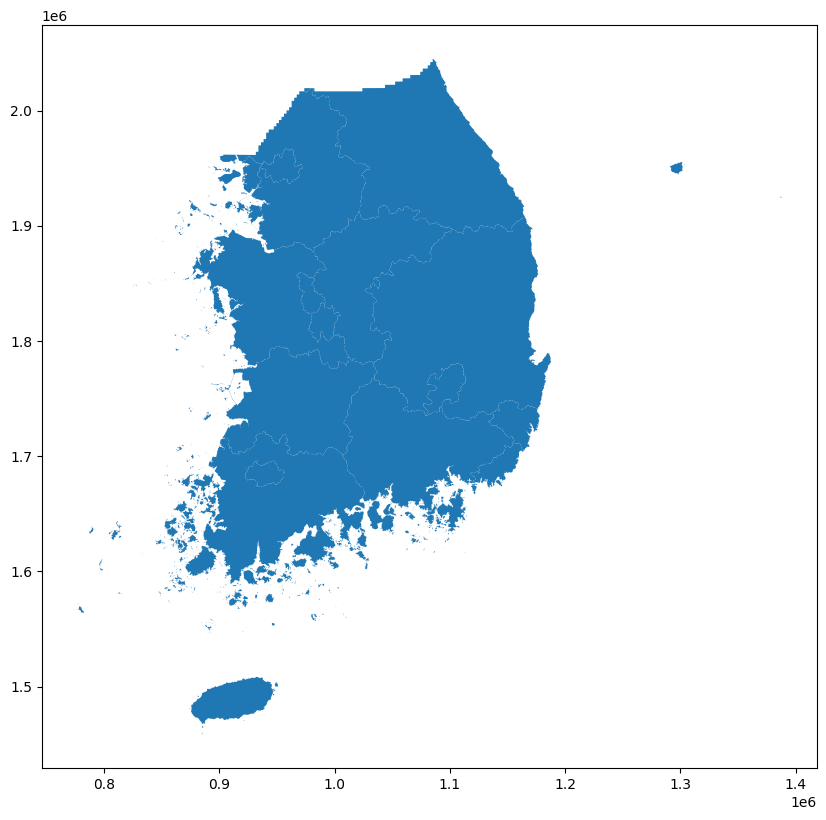

In [6]:
sido_gdf.plot(figsize=(10,10))

혹시 에러가 발생하는지요?   
맨 아래의 ImportError의 설명을 참조했을 때 어떻게 하면 좋을지요? (힌트 : 패키지 설치) 

In [7]:
!pip install matplotlib

You should consider upgrading via the 'C:\Users\thlee\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


X와 Y 좌표축의 숫자는 무슨 의미(단위)일까요?   
시도 행정경계 데이터의 좌표계는 어떻게 알 수 있을까요?

In [8]:
sido_gdf.crs

<Derived Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

내려받은 shp 파일에 .prj 파일이 포함되어 있는지요?   
.prj 파일은 좌표계 정보를 담고 있는 파일로서 .prj가 포함되어 있으면 geopandas의 .crs 를 이용하여 좌표계 정보를 알 수 있습니다.   
EPSG:5179는 UTN-K로도 불리는 대한민국 전체를 커버하는 단일 평면직각좌표계입니다.   
https://epsg.io/5179

만약 .prj 파일이 없다면 어떤 차이가 있을까요?   
궁금하면 .prj 파일의 파일명을 변경하거나, 확장자명을 변경한 다음에 이 노트의 맨 위부터 다시 코드를 실행해 보면 됩니다.    

---

.prj가 없을 때 어떤 차이가 있는지는 알겠지만     
좌표계 정보가 없을 때 좌표계 정보를 어떻게 유추해볼 수 있을까요?    

1. 좌표축의 자리 수와 범위를 보는 방법
2. 배경지도를 띄워서 배경지도 상에서의 위치를 보는 방법   

등이 있을 것 같고, 여기서는 우선 1번 방법을 이용해볼 수 있을 것 같습니다.   

폴리곤의 좌표는 어디에서 볼 수 있었던가요?  
지도 상에서의 좌표 축의 숫자는 무엇이고, 어떻게 바꿔볼 수 있을까요?  

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (10, 10) #차트 사이즈

C:\Users\thlee\AppData\Local\Temp\ipykernel_24568\42850082.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in value_of_y])
C:\Users\thlee\AppData\Local\Temp\ipykernel_24568\42850082.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in value_of_x])


[Text(700000.0, 0, '700000'),
 Text(800000.0, 0, '800000'),
 Text(900000.0, 0, '900000'),
 Text(1000000.0, 0, '1000000'),
 Text(1100000.0, 0, '1100000'),
 Text(1200000.0, 0, '1200000'),
 Text(1300000.0, 0, '1300000'),
 Text(1400000.0, 0, '1400000'),
 Text(1500000.0, 0, '1500000')]

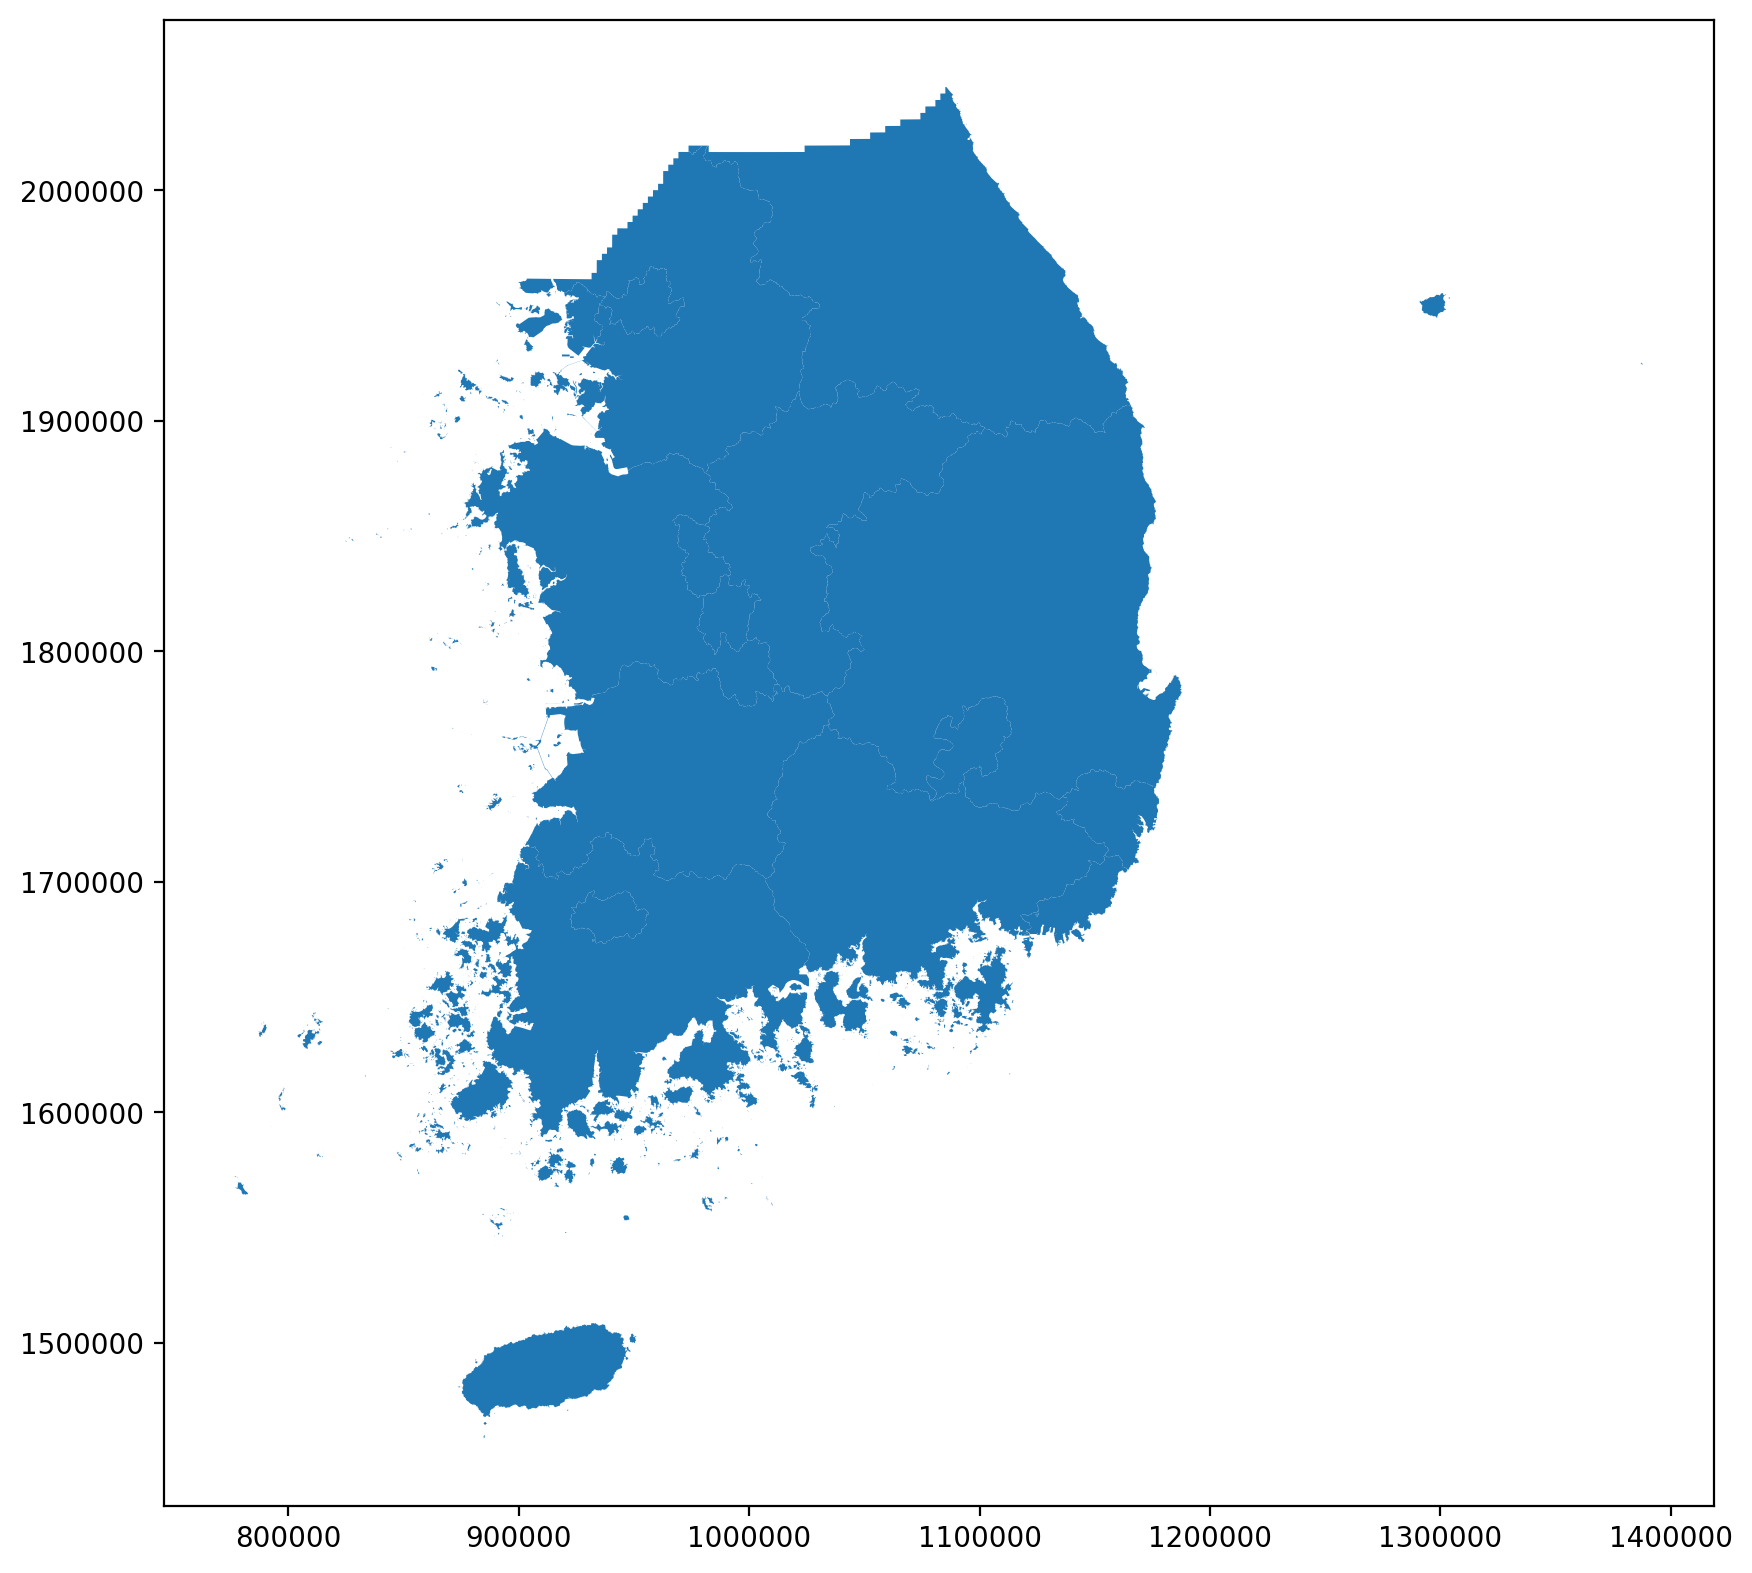

In [10]:
sido_gdf.plot(figsize=(10,10))
 
value_of_y = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in value_of_y])

value_of_x = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in value_of_x])

위의 방법으로 지수(Scientific Notation)를 원래의 십진수 형식으로 바꿔봤습니다.  
좌표계를 유추할 수 있는지요?

### 수고 많으셨습니다!!! 